<a href="https://colab.research.google.com/github/rohit-anan/Deep-learning-projects/blob/main/Neural_Networks_Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTI-CLASS CLASSIFICATION**

* ## CLASSIFYING NEWSWIRES

### 1. Loading the Reuters data set



1.a. The dataset

It is a set of short newswires and their topics.

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

The 'num_words=10000' restricts the data to the 10,000 most frequently occuring words found in the data.

In [ ]:
len(train_data)

8982

In [ ]:
print(train_data[10])  # each example is a set of integers(word indices)

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


1.b. Decoding the newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key)for(key,value) in word_index.items()])
decoded_newswires = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)


In [ ]:
train_labels[10]

3

### 2. Preparing the data

2.a. Encoding the input data

In [ ]:
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

2.b. Encoding the labels

In [ ]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1.
  return results

In [ ]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

there is also a built-in way to do this in keras.

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 3. Building our model

3.a. Model definition

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax')
])

3.b. Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

### 4. Validating our approach

4.a. Setting apart 1000 samples as validation set.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


4.b. Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 3s 102ms/step - loss: 2.7574 - accuracy: 0.4783 - val_loss: 1.9311 - val_accuracy: 0.5970
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.6369 - accuracy: 0.6572 - val_loss: 1.4419 - val_accuracy: 0.6750
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.2517 - accuracy: 0.7250 - val_loss: 1.2278 - val_accuracy: 0.7170
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0241 - accuracy: 0.7764 - val_loss: 1.1188 - val_accuracy: 0.7330
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8533 - accuracy: 0.8143 - val_loss: 1.0516 - val_accuracy: 0.7640
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.7097 - accuracy: 0.8505 - val_loss: 0.9930 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5932 - accuracy: 0.8742 - val_loss: 0.9212 - val_accuracy: 0.8140
Epoch 8/20
1

### 5. Plotting accuracy and loss

5.a. Plotting the training and validation loss

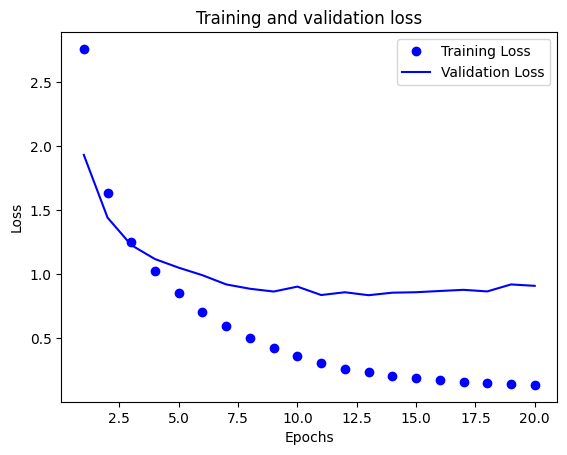

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss=history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

5.b. Plotting the training and validation accuracy

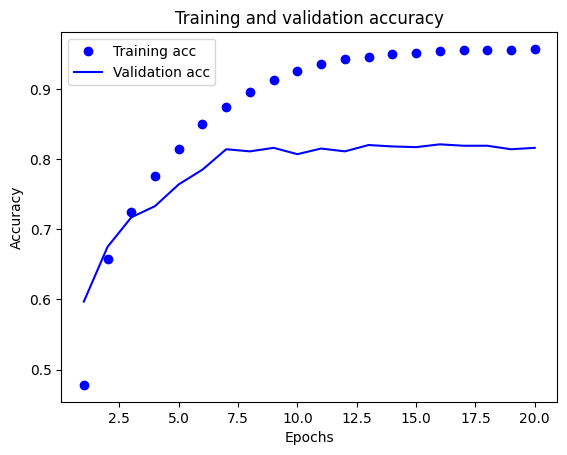

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here the model starts to overfit after nine epochs.
We need to train a new model for nine epochs from scratch and then evaluate it on the test set.

### 6. Retraining the model from scratch

6.a. New model(n_model)

In [ ]:
n_model= keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation="softmax")
])

In [ ]:
n_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
n_model.fit(x_train,
            y_train,
            epochs=9,
            batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.5428 - accuracy: 0.4986
Epoch 2/9
18/18 [==============================] - 1s 85ms/step - loss: 1.4596 - accuracy: 0.6908
Epoch 3/9
18/18 [==============================] - 1s 70ms/step - loss: 1.1344 - accuracy: 0.7494
Epoch 4/9
18/18 [==============================] - 1s 57ms/step - loss: 0.9237 - accuracy: 0.8016
Epoch 5/9
18/18 [==============================] - 1s 40ms/step - loss: 0.7606 - accuracy: 0.8343
Epoch 6/9
18/18 [==============================] - 1s 39ms/step - loss: 0.6263 - accuracy: 0.8672
Epoch 7/9
18/18 [==============================] - 1s 41ms/step - loss: 0.5178 - accuracy: 0.8910
Epoch 8/9
18/18 [==============================] - 1s 40ms/step - loss: 0.4305 - accuracy: 0.9088
Epoch 9/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3659 - accuracy: 0.9221


In [ ]:
results = n_model.evaluate(x_test,y_test)

71/71 [==============================] - 1s 5ms/step - loss: 0.9289 - accuracy: 0.7890


In [ ]:
results

[0.9289252758026123, 0.7889581322669983]

### 7. Generating predictions new data

In [ ]:
predictions = n_model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [ ]:
print(predictions[0].shape)

(46,)


each entry in "predictions" is a vector of length = 46.

In [ ]:
np.sum(predictions[0])

1.0

the coefficients in this vector sum to 1, as they form a probability distribution.